 # Case Study: Hacker Statistics
 This case study is on[ DataCamp](https://datacamp.com).

 

 ## The case
 
Imagine the following: you're walking up this building below to your apartment which is on the 100th floor and you're playing a game with a friend. 

You throw a die one hundred times.

- If it's 1 or 2 you'll go one step down.

- If it's 3, 4, or 5, you'll go one step up.

- If you throw a 6, you'll throw the die again and will walk up the resulting number of steps.

- you can not go lower than step number 0. 

- And also, you admit that you're a bit clumsy and have a chance of 0.1% of falling down the stairs when you make a move. 

- Falling down means that you have to start again from step 0. 

With all of this in mind, you bet with your friend that you'll reach 60 steps high.

> **What is the chance that you will win this bet?**

It's a complex assignment. 

- One way to solve it would be to calculate the chance analytically using equations. 

- Another possible approach, is to simulate this process thousands of times, and see in what fraction of the simulations that you will reach 60 steps. This is a form of **-hacker statistics-**.
 
 we're going to opt for the second approach.

 <img src="random_walk.JPG" width=500/>
  <img src="random_walk1.JPG" width=500/>

# General Background
Lets talk a little bit about hacker statistics and simulation.

### Hacker Statistics

Use simulated repeated measurements to gather more info about data. The basic idea is that instead of literally repeating the data acquisition over and over again, we can simulate those repeated measurements using Python. For our first simulation, we will take a cue from our forebears. The concepts of probability originated from studies of games of chance.

### Simulation
A simulation is the imitation of the operation of `a real-world process` or system `over time`. Simulations require the use of models; the model represents the key characteristics or behaviors of the selected system or process, whereas the simulation represents the evolution of the model over time.



| <img src="Data_analysis_process.png" width=600/> | 
|:--:| 
| The Framework I use on my data analysis process. It guides this case study. |


# Ask
The first thing we do in any data analysis project is to define the problem we are trying to solve or the question we need to answer.
In this case study we are trying to find the answer to the following question.
> **What is your chance at winning the bet?**

# Prepare
In this phase we will prepare our data by simulating it.
Also, we are going to work step by step on our code according to the conditions we have on the case study.

#### 1. Simulating dice rolling
We need random generators, so we can simulate the die. We need to import numpy, and inside numpy, we have the random package.

In [142]:
import numpy as np

We will use simulation to simulate dice rolling


**Simulation** is our tool that we use to imitate the operation of a real-world process or system over time.

we will roll the dice by using the `randint()` method which will simulate dice rolling by generating random integers within a range. Our range is 1 to 6. 
> Note: This method is an alias for randrange(start, stop+1).

We will set random seed which return the same random number over and over again. This called `semi-random`

In [143]:
np.random.seed(100)
dice = np.random.randint(1, 7)
dice

1

**2. Cheching conditions on the case study using if statement**
- If it's 1 or 2 you'll go one step down.

- If it's 3, 4, or 5, you'll go one step up.

- If you throw a 6, you'll throw the die again and will walk up the resulting number of steps.


In [144]:
step = 0  # our first step is of course zero

if dice <= 2 :
    step = step - 1
elif dice > 2 and dice < 6 :
    step = step + 1
else :
    step = step + np.random.randint(1,7)

**3. Simulating 100 step according to dice rolling result**

We need now to simulate 100 random steps representing your walks every time you throw the dice.
We can use for loop to achieve this.

In [145]:
# Initializing the random_walk list to capture the 100 steps
random_walk = [0]

for x in range(100) :
    # Set step: last element in random_walk
    step = random_walk[-1]

    # Roll the dice
    dice = np.random.randint(1,7)

    # Determine next step
    if dice <= 2:
        step = step - 1
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    # append next_step to random_walk
    random_walk.append(step)

# Print random_walk
print(random_walk)

[0, -1, 0, -1, 0, 1, 2, 5, 6, 7, 6, 5, 4, 5, 6, 7, 8, 7, 8, 7, 10, 11, 12, 13, 12, 18, 19, 20, 21, 22, 23, 24, 23, 22, 26, 25, 26, 25, 24, 25, 26, 30, 29, 28, 27, 32, 33, 32, 31, 32, 35, 34, 33, 36, 35, 40, 41, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 53, 52, 53, 54, 55, 58, 59, 60, 61, 66, 65, 66, 67, 66, 67, 68, 69, 74, 75, 76, 77, 79, 78, 77, 79, 82, 83, 84, 85, 86]


**4. Step can't go below 0**

From your 100 step above, you can there are some negative steps but we need to avoid that.

We can use `max()` function to solve that on the first condition where we get the negative step from.

In [146]:
# Initialize random_walk
random_walk = [0]

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        # Replace below: use max to make sure step can't go below 0
        step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

print(random_walk)

[0, 0, 1, 2, 1, 0, 6, 5, 9, 8, 9, 10, 15, 16, 17, 18, 19, 18, 17, 16, 17, 20, 25, 26, 28, 27, 26, 25, 26, 27, 26, 30, 31, 32, 33, 38, 37, 38, 37, 38, 37, 36, 39, 40, 41, 42, 43, 42, 43, 42, 45, 46, 47, 48, 52, 53, 56, 55, 56, 58, 60, 61, 62, 63, 64, 69, 70, 69, 70, 69, 70, 73, 75, 74, 75, 80, 79, 80, 81, 82, 83, 84, 85, 84, 86, 87, 88, 89, 88, 87, 90, 89, 88, 87, 86, 89, 90, 91, 90, 95, 99]


# Process
We don't have processing on this simulated data since it is already clean.

# Analyze

Now we are going to analyze these steps trying to understand it and drive insights from it where we can then solve our problem

**1. Visulizing the walk**

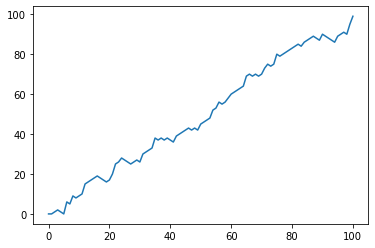

In [147]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Plot random_walk
plt.plot(random_walk)

# Show the plot
plt.show()

A single random walk doesn't tell you if you have a good chance at winning the bet.

To get an idea about how big your chances are of reaching 60 steps, we can repeatedly simulate the random walk more times and collect the results. And that's exactly what we'll do now.

In [148]:
# Initializing all_walks list to capture all 100 times walks
all_walks = []

# Simulate random walk 10 times
for i in range(100) :

    # Code from before
    random_walk = [0]
    for x in range(100) :  
        step = random_walk[-1] # last random step
        dice = np.random.randint(1,7)  # Generating random walk

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)

    # Append random_walk to all_walks
    all_walks.append(random_walk)

print(all_walks)


[[0, 1, 0, 1, 2, 1, 6, 7, 8, 9, 15, 16, 17, 18, 19, 20, 21, 20, 19, 18, 24, 25, 26, 25, 26, 25, 27, 28, 29, 30, 31, 32, 31, 32, 31, 32, 33, 32, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 44, 43, 44, 45, 44, 43, 42, 48, 47, 46, 47, 46, 47, 52, 51, 57, 58, 59, 60, 63, 64, 65, 64, 63, 64, 63, 62, 63, 64, 63, 64, 63, 64, 63, 64, 65, 66, 67, 72, 76, 75, 76, 77, 78, 77, 78, 77, 78, 77], [0, 0, 1, 2, 3, 2, 5, 4, 8, 7, 8, 12, 13, 14, 18, 17, 16, 18, 19, 20, 21, 22, 23, 24, 23, 25, 26, 27, 26, 25, 24, 25, 24, 25, 26, 27, 28, 29, 30, 31, 32, 31, 32, 33, 32, 33, 32, 35, 36, 37, 38, 37, 38, 43, 44, 45, 46, 45, 44, 45, 44, 45, 46, 47, 48, 47, 46, 47, 48, 49, 50, 51, 52, 54, 59, 58, 57, 63, 62, 63, 62, 61, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 70, 72, 73, 74, 75, 76, 75, 76, 75], [0, 1, 0, 1, 4, 5, 4, 5, 4, 3, 2, 1, 2, 1, 0, 1, 2, 1, 2, 3, 4, 5, 6, 5, 4, 5, 6, 7, 6, 11, 10, 11, 13, 14, 18, 17, 16, 15, 14, 15, 14, 13, 12, 16, 21, 22, 21, 22, 21, 22, 21, 22, 23, 25, 26, 28, 29, 34, 35, 

**2. Visualize all walks**

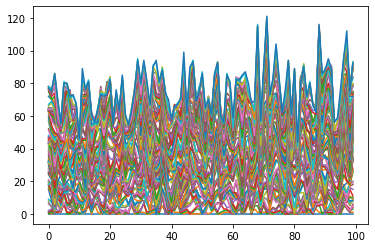

In [149]:
# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)

# Plot np_aw and show
plt.plot(np_aw)
plt.show()


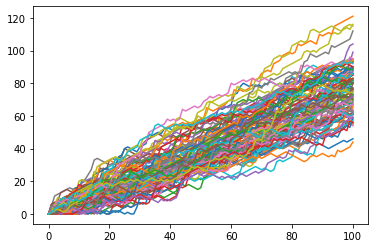

In [150]:
# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

All these fancy visualizations have put us on a sidetrack. We still have to solve the million-dollar problem: **What are the odds that you'll reach 60 steps high on the Building?**

Basically, you want to know about the end points of all the random walks you've simulated. These end points have a certain distribution that you can visualize with a histogram.

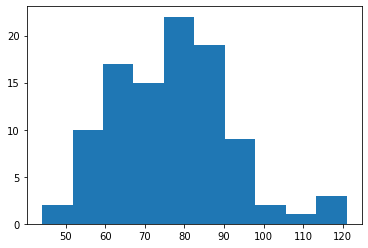

In [151]:
# Select last row from np_aw_t: ends
ends = np_aw_t[-1,:]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()


**3. last step**

In [152]:
# To find the chance of winning the bet.
np.mean(ends >= 60 )

0.88

# Share
In this phase, we share our results.
As we can see from our analysis, 
> The chance of winnng the bet is **0.88%**


# Act
In the act phase, we act upon our insights and use what we found on the analysis to make better decisions - data-driven decisions.


> Now the decision is up to you whether to go for the bet or not. You now know your winning chance.
Good luck.


# All Code

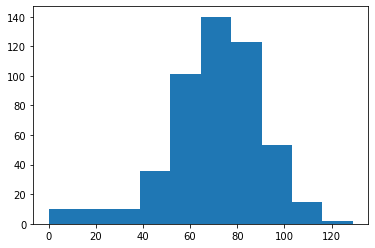

You have a chance of 77.0%


In [153]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(100)

# Simulate random walk 500 times
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np_aw_t[-1,:]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

# To find the chance of winning the bet.
print("You have a chance of " + str(round(np.mean(ends >= 60 )*100, 2)) + "%")
